# `opencadd.databases.klifs` API

This notebook proposes an updated object-oriented API (skeleton only!) for the `opencadd.databases.klifs` module.

## Module structure

In [1]:
from bravado.client import SwaggerClient
from bravado_core.exception import SwaggerMappingError

KLIFS_API_DEFINITIONS = "http://klifs.vu-compmedchem.nl/swagger/swagger.json"
KLIFS_CLIENT = SwaggerClient.from_url(
    KLIFS_API_DEFINITIONS, config={"validate_responses": False}
)

## Set up session (remote and local)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [4]:
from opencadd.databases.klifs.api import setup_remote, setup_local

In [5]:
from opencadd.databases.klifs.remote import Kinases

In [6]:
# Work with remote KLIFS data
remote = setup_remote()

# Work with local KLIFS data
local = setup_local("../../opencadd/tests/databases/data/KLIFS_download")

INFO:opencadd.databases.klifs.api:Set up remote session...
INFO:opencadd.databases.klifs.api:Remote session is ready!
INFO:opencadd.databases.klifs.api:Set up local session...
INFO:opencadd.databases.klifs.local:Load overview.csv...
INFO:opencadd.databases.klifs.local:Load KLIFS_export.csv...
INFO:opencadd.databases.klifs.local:Merge both csv files...
INFO:opencadd.databases.klifs.local:Add paths to coordinate folders to structures...
INFO:opencadd.databases.klifs.local:Add KLIFS IDs to structures...
INFO:opencadd.databases.klifs.api:Local session is ready!


In [7]:
print(remote.session_type)
remote.client

remote


SwaggerClient(http://klifs.vu-compmedchem.nl/api)

In [8]:
print(local.session_type)
local.database

local


,species.klifs,structure.pdb,structure.alternate_model,structure.chain,ligand.pdb,ligand.pdb_allosteric,structure.rmsd1,structure.rmsd2,structure.qualityscore,kinase.pocket,structure.resolution,structure.missing_residues,structure.missing_atoms,interaction.fingerprint,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,kinase.name,kinase.name_all,kinase.family,kinase.group,ligand.name,ligand.name_allosteric,structure.dfg,structure.ac_helix,structure.filepath,structure.id,kinase.id
0,Human,3sxr,-,A,1N1,-,0.839,1.967,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.40,4,0,0000000000000010000001000000000000000000000000...,0,0,1,1,0,0,0,0,0,0,0,0,BMX,[BMX],Tec,TK,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,out-like,in,HUMAN/BMX/3sxr_chainA,3482,472
1,Human,6uuo,-,A,QH1,-,0.806,2.028,5.2,QRI____FGTVYKVAVKMLAFKNEVGVLRKTRVNILLFMGYAIVTQ...,3.29,7,61,0000000000000000000000000000000000000000000000...,0,0,1,1,1,1,0,0,0,0,0,0,BRAF,[BRAF],RAF,TKL,1-[4-{[1-(3-{[dihydroxy(propyl)-lambda~4~-sulf...,-,in,out-like,HUMAN/BRAF/6uuo_chainA,12347,509
2,Mouse,1fpu,-,A,PRC,-,0.925,2.319,8.8,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.40,0,8,0000000000000010000000000000000000000000000000...,0,0,1,1,0,0,0,1,0,0,0,0,Abl1,"[Abl1, ABL1]",Abl,TK,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,MOUSE/Abl1/1fpu_chainA,5728,532
3,Mouse,1fpu,-,B,PRC,-,0.925,2.329,9.2,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.40,0,4,0000000000000010000000000000000000000000000000...,0,0,0,1,0,0,0,1,0,0,0,0,Abl1,"[Abl1, ABL1]",Abl,TK,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,MOUSE/Abl1/1fpu_chainB,5705,532


In [9]:
local.database.columns

Index(['species.klifs', 'structure.pdb', 'structure.alternate_model',
       'structure.chain', 'ligand.pdb', 'ligand.pdb_allosteric',
       'structure.rmsd1', 'structure.rmsd2', 'structure.qualityscore',
       'kinase.pocket', 'structure.resolution', 'structure.missing_residues',
       'structure.missing_atoms', 'interaction.fingerprint', 'structure.fp_i',
       'structure.fp_ii', 'structure.bp_i_a', 'structure.bp_i_b',
       'structure.bp_ii_in', 'structure.bp_ii_a_in', 'structure.bp_ii_b_in',
       'structure.bp_ii_out', 'structure.bp_ii_b', 'structure.bp_iii',
       'structure.bp_iv', 'structure.bp_v', 'kinase.name', 'kinase.name_all',
       'kinase.family', 'kinase.group', 'ligand.name',
       'ligand.name_allosteric', 'structure.dfg', 'structure.ac_helix',
       'structure.filepath', 'structure.id', 'kinase.id'],
      dtype='object')

## Pockets

In [10]:
import pandas as pd

In [11]:
remote.pockets.from_structure_id(100)

,residue.klifs_id,residue.pdb_id,residue.klifs_region
0,1,542,I.1
1,2,543,I.2
2,3,544,I.3
3,4,545,g.l.4
4,5,546,g.l.5
...,...,...,...
80,81,697,xDFG.81
81,82,698,xDFG.82
82,83,699,xDFG.83
83,84,700,a.l.84


In [12]:
local.pockets.from_structure_id(12347)

,residue.klifs_id,residue.pdb_id,residue.klifs_region
0,1,461,I.1
1,2,462,I.2
2,3,463,I.3
3,8,468,g.l.8
4,9,469,g.l.9
...,...,...,...
73,78,584,VII.78
74,79,592,VIII.79
75,80,593,xDFG.80
76,81,594,xDFG.81


## Kinases

Try out functionalities to request kinase data. Show remote and local access in parallel.

In [13]:
try:
    remote.pockets.from_structure_id(100000)
except SwaggerMappingError as e:
    print(e)

Expected type to be dict for value [400, 'KLIFS error: Structure not found'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


### All kinase groups

In [14]:
remote.kinases.all_kinase_groups()

,kinase.group
0,AGC
1,CAMK
2,CK1
3,CMGC
4,Other
5,STE
6,TK
7,TKL


In [15]:
local.kinases.all_kinase_groups()

,kinase.group
0,TK
1,TKL


### All kinase families

In [16]:
print(remote.kinases.all_kinase_families().shape)
remote.kinases.all_kinase_families().head()

(144, 1)


,kinase.family
0,A6
1,ABC1
2,AKT
3,ALK
4,AUR


In [17]:
print(local.kinases.all_kinase_families().shape)
local.kinases.all_kinase_families().head()

(3, 1)


,kinase.family
0,Tec
1,RAF
2,Abl


### All kinase families in a kinase group

In [18]:
print(remote.kinases.all_kinase_families(group='TK').shape)
remote.kinases.all_kinase_families(group='TK').head()

(31, 1)


,kinase.family
0,ALK
1,Abl
2,Ack
3,Alk
4,Axl


In [19]:
local.kinases.all_kinase_families(group='TK')

,kinase.family
0,Tec
1,Abl


### All kinase families in a non-existing kinase group

In [20]:
try:
    remote.kinases.all_kinase_families(group='XXX')
except SwaggerMappingError as e:
    print(e)

Expected type to be dict for value [400, 'KLIFS error: A provided group does not exist.'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [21]:
try:
    local.kinases.all_kinase_families('XXX')
except ValueError as e:
    print(e)

Input values yield no results.


### All kinase names

In [22]:
print(remote.kinases.all_kinases().shape)
remote.kinases.all_kinases().head()

(1127, 4)


,kinase.id,kinase.name,kinase.name_full,species.klifs
0,813,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
1,815,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
2,814,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
3,531,Aak1,AP2 associated kinase 1,Mouse
4,277,AAK1,AP2 associated kinase 1,Human


In [23]:
local.kinases.all_kinases(family="Tec")

,kinase.name,species.klifs
0,BMX,Human


In [24]:
remote.kinases.all_kinases(group='TK', family='Tec', species="Mouse")

,kinase.id,kinase.name,kinase.name_full,species.klifs
0,574,Bmx,BMX non-receptor tyrosine kinase,Mouse
1,583,Btk,Bruton agammaglobulinemia tyrosine kinase,Mouse
2,739,Itk,IL2 inducible T cell kinase,Mouse
3,1008,Tec,tec protein tyrosine kinase,Mouse
4,1039,Txk,TXK tyrosine kinase,Mouse


In [25]:
local.kinases.all_kinases(family="Abl", species="Mouse")

,kinase.name,species.klifs
0,Abl1,Mouse


In [26]:
try:
    remote.kinases.all_kinases(group='XXX')
except SwaggerMappingError as e:
    print(e)

Expected type to be dict for value [400, 'KLIFS error: A provided group does not exist.'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [27]:
try:
    local.kinases.all_kinases(group='XXX')
except ValueError as e:
    print(e)

Input values yield no results.


### Kinase by kinase ID

In [28]:
remote.kinases.from_kinase_ids(33)

,kinase.id,kinase.name,kinase.hgnc,kinase.family,kinase.group,kinase.class,species.klifs,kinase.name_full,kinase.uniprot,kinase.iuphar,kinase.pocket
0,33,PKCa,PRKCA,PKC,AGC,Alpha,Human,protein kinase C alpha,P17252,1482,MVLGKGSFGKVMLYAIKILCTMVEKRVLALLDPFLTQLHSCYFVME...


In [29]:
try:
    remote.kinases.from_kinase_ids(10000)
except SwaggerMappingError as e:
    print(e)

Expected type to be dict for value [400, 'KLIFS error: An unknown kinase ID was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [30]:
remote.kinases.from_kinase_ids([1,2,10000])

,kinase.id,kinase.name,kinase.hgnc,kinase.family,kinase.group,kinase.class,species.klifs,kinase.name_full,kinase.uniprot,kinase.iuphar,kinase.pocket
0,1,AKT1,AKT1,Akt,AGC,,Human,v-akt murine thymoma viral oncogene homolog 1,P31749,1479,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...
1,2,AKT2,AKT2,Akt,AGC,,Human,v-akt murine thymoma viral oncogene homolog 2,P31751,1480,KLLGKGTFGKVILYAMKILHTVTESRVLQNTRPFLTALKYACFVME...


Get kinase metadata for all kinase IDs.

In [31]:
kinase_ids_all = remote.kinases.all_kinases()["kinase.id"].to_list()
kinases_all = remote.kinases.from_kinase_ids(kinase_ids_all)

In [32]:
print(*kinases_all["kinase.family"].unique())

Akt DMPK GRK MAST NDR PDK1 PKA PKC PKG PKN RSK RSKb RSKL RSKR SGK YANK ABC1 Alpha BCR BRD FAST G11 H11 PDHK PIKK RIO TAF1 TIF1 CAMK1 CAMK2 CAMKL CAMK-Unique CASK DAPK DCAMKL MAPKAPK MLCK PHK PIM PKD PSK RAD53 SgK495 Trbl Trio TSSK CK1 TTBK VRK CDK CDKL CK2 CLK DYRK GSK MAPK RCK SRPK Aur BUB Bud32 CAMKK CDC7 Haspin IKK IRE KIS MOS NAK NEK NKF1 NKF2 NKF3 NKF4 NKF5 NRBP Other-Unique PEK STE-Unique PLK SCY1 SgK071 SgK493 SgK496 Slob TBCK TLK TOPK TTK ULK VPS15 WEE WNK RGC STE11 STE20 STE7 Abl Ack ALK Axl CCK4 Csk DDR EGFR Eph FAK Fer FGFR InsR JakA JakB Lmr Met Musk PDGFR Ret Ror Ryk Sev Src Syk Tec Tie TK-Unique Trk VEGFR IRAK LISK LRRK MLK RAF RIPK STKR TKL-Unique A6 AKT Alk AUR Wnk PIK PIPK PAN3 PIP


In [33]:
print(*kinases_all["kinase.group"].unique())

AGC CAMK Atypical CK1 CMGC Other STE RGC TK TKL


In [34]:
kinases_all["kinase.pocket"].iloc[100]

'NQMGVGKESDIYIFALKLHSAMKEFAYMKALYFPVPKPIDYAVVMELINGYPLCQIHHVLANHG-LIHGDFNEFNLILMIDFPQM'

### Kinase by kinase name

In [35]:
remote.kinases.from_kinase_names('BMX')

Processing BMX...: 100%|██████████| 1/1 [00:00<00:00, 15.82it/s]


,kinase.id,kinase.name,kinase.hgnc,kinase.family,kinase.group,kinase.class,species.klifs,kinase.name_full,kinase.uniprot,kinase.iuphar,kinase.pocket
0,574,BMX,Bmx,Tec,TK,,Mouse,BMX non-receptor tyrosine kinase,P97504,0,KELGNGQFGVVQLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...
1,472,BMX,BMX,Tec,TK,,Human,BMX non-receptor tyrosine kinase,P51813,1942,KELGSGQFGVVQLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...


In [36]:
local.kinases.from_kinase_names('BMX')

,kinase.name,kinase.group,kinase.family,species.klifs,kinase.pocket
0,BMX,TK,Tec,Human,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...


In [37]:
try:
    remote.kinases.from_kinase_names("BMX", "xxx")
except SwaggerMappingError as e:
    print(e)

Processing BMX...: 100%|██████████| 1/1 [00:00<00:00, 18.21it/s]
ERROR:opencadd.databases.klifs.core:There was (were) 1/1 failed request(s).
Show error messages (up to 5 messages only):
ERROR:opencadd.databases.klifs.core:Error for BMX: Expected type to be dict for value [400, 'KLIFS error: The provided species does not exist. '] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


None of the input values exist, thus no results are returned.


In [38]:
remote.kinases.from_kinase_names(['EGFR', 'XXX'], None)

Processing XXX...: 100%|██████████| 2/2 [00:00<00:00, 11.32it/s]
ERROR:opencadd.databases.klifs.core:There was (were) 1/2 failed request(s).
Show error messages (up to 5 messages only):
ERROR:opencadd.databases.klifs.core:Error for XXX: Expected type to be dict for value [400, 'KLIFS error: An unknown kinase name was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


,kinase.id,kinase.name,kinase.hgnc,kinase.family,kinase.group,kinase.class,species.klifs,kinase.name_full,kinase.uniprot,kinase.iuphar,kinase.pocket
0,406,EGFR,EGFR,EGFR,TK,,Human,epidermal growth factor receptor,P00533,1797,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...
1,663,EGFR,Egfr,EGFR,TK,,Mouse,epidermal growth factor receptor,Q01279,0,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...


In [39]:
local.kinases.from_kinase_names(['BMX', 'BRAF'])

,kinase.name,kinase.group,kinase.family,species.klifs,kinase.pocket
0,BMX,TK,Tec,Human,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...
1,BRAF,TKL,RAF,Human,QRI____FGTVYKVAVKMLAFKNEVGVLRKTRVNILLFMGYAIVTQ...


In [40]:
remote.kinases.from_kinase_names(['BMX', 'XXX'])

Processing XXX...: 100%|██████████| 2/2 [00:00<00:00, 12.89it/s]
ERROR:opencadd.databases.klifs.core:There was (were) 1/2 failed request(s).
Show error messages (up to 5 messages only):
ERROR:opencadd.databases.klifs.core:Error for XXX: Expected type to be dict for value [400, 'KLIFS error: An unknown kinase name was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


,kinase.id,kinase.name,kinase.hgnc,kinase.family,kinase.group,kinase.class,species.klifs,kinase.name_full,kinase.uniprot,kinase.iuphar,kinase.pocket
0,574,BMX,Bmx,Tec,TK,,Mouse,BMX non-receptor tyrosine kinase,P97504,0,KELGNGQFGVVQLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...
1,472,BMX,BMX,Tec,TK,,Human,BMX non-receptor tyrosine kinase,P51813,1942,KELGSGQFGVVQLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...


In [41]:
try:
    remote.kinases.from_kinase_names(['YYY', 'XXX'])
except SwaggerMappingError as e:
    print(e)

Processing XXX...: 100%|██████████| 2/2 [00:00<00:00, 10.92it/s]
ERROR:opencadd.databases.klifs.core:There was (were) 2/2 failed request(s).
Show error messages (up to 5 messages only):
ERROR:opencadd.databases.klifs.core:Error for YYY: Expected type to be dict for value [400, 'KLIFS error: An unknown kinase name was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.
Error for XXX: Expected type to be dict for value [400, 'KLIFS error: An unknown kinase name was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


None of the input values exist, thus no results are returned.


In [42]:
try:
    remote.kinases.from_kinase_names([1,2])
except SwaggerMappingError as e:
    print(e)

Processing 2...: 100%|██████████| 2/2 [00:00<00:00, 302.89it/s]
ERROR:opencadd.databases.klifs.core:There was (were) 2/2 failed request(s).
Show error messages (up to 5 messages only):
ERROR:opencadd.databases.klifs.core:Error for 1: 1 is not of type 'string'

Failed validating 'type' in schema:
    {'description': 'The name (or multiple names separated by a comma) of '
                    '(a) specfic kinase(s) (e.g. ABL1).',
     'in': 'query',
     'name': 'kinase_name',
     'required': True,
     'type': 'string'}

On instance:
    1
Error for 2: 2 is not of type 'string'

Failed validating 'type' in schema:
    {'description': 'The name (or multiple names separated by a comma) of '
                    '(a) specfic kinase(s) (e.g. ABL1).',
     'in': 'query',
     'name': 'kinase_name',
     'required': True,
     'type': 'string'}

On instance:
    2


None of the input values exist, thus no results are returned.


In [43]:
try:
    local.kinases.from_kinase_names(['YYY', 'XXX'])
except ValueError as e:
    print(e)

Input values yield no results.


### Kinases by kinase names and species

In [44]:
remote.kinases.from_kinase_names(['ABL1', 'NIK'], 'Mouse')

Processing NIK...: 100%|██████████| 2/2 [00:00<00:00, 10.69it/s] 


,kinase.id,kinase.name,kinase.hgnc,kinase.family,kinase.group,kinase.class,species.klifs,kinase.name_full,kinase.uniprot,kinase.iuphar,kinase.pocket
0,532,ABL1,Abl1,Abl,TK,,Mouse,"c-abl oncogene 1, non-receptor tyrosine kinase",P00520,0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...
1,861,NIK,Map3k14,STE-Unique,STE,,Mouse,mitogen-activated protein kinase kinase kinase 14,Q9WUL6,0,PRVGRGSFGEVHRCAVKKVFRVEELVACAGLSPRIVPLYGANIFME...


In [45]:
local.kinases.from_kinase_names(['BRAF', 'NIK'], 'Human')

,kinase.name,kinase.group,kinase.family,species.klifs,kinase.pocket
0,BRAF,TKL,RAF,Human,QRI____FGTVYKVAVKMLAFKNEVGVLRKTRVNILLFMGYAIVTQ...


## Ligands

### All ligands

In [46]:
remote.ligands.all_ligands()

,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey
0,1,IHZ,5-[(2-methyl-5-{[3-(trifluoromethyl)phenyl]car...,FC(F)(F)c1cc(NC(=O)c2cc(Nc3cncc(c3)C(=O)N)c(cc...,SAAYRHKJHDIDPH-UHFFFAOYSA-N
1,2,477,"3-{2-[5-(difluoromethyl)-2H-thieno[3,2-c]pyraz...",S1C=2C(=NNC2C=C1C(F)F)C=3Nc4c(ccc(c4)C(O)(CC)C...,CQZZZUNOWZUNNG-UHFFFAOYSA-N
2,3,G6K,"1-[(3S)-3-{[4-(morpholin-4-ylmethyl)-6-([1,3]t...",S1c2ncccc2N=C1Nc3nc(nc(c3)CN4CCOCC4)N[C@@H]5CN...,JSHRNKDQLCOTRI-HNNXBMFYSA-N
3,4,G5K,"1-[(3S)-3-{[4-(morpholin-4-ylmethyl)-6-([1,3]t...",S1c2ncccc2N=C1Nc3nc(nc(c3)CN4CCOCC4)N[C@@H]5CN...,LZANMDGKZJPQIB-HNNXBMFYSA-N
4,5,B49,N-[2-(diethylamino)ethyl]-5-[(Z)-(5-fluoro-2-o...,Fc1cc\2c(NC(=O)/C2=C\C=3NC(=C(C(=O)NCCN(CC)CC)...,WINHZLLDWRZWRT-ATVHPVEESA-N
...,...,...,...,...,...
3522,3811,R7D,N~2~-{(2R)-2-hydroxy-2-[4-(trifluoromethyl)phe...,O[C@@H](C(=O)N[C@@H](CS)C(=O)NCc1ccccn1)c2ccc(...,MMSMEDXVHMERGZ-LSDHHAIUSA-N
3523,3812,OQ8,~{N}-[4-[(4-ethylpiperazin-1-yl)methyl]-3-(tri...,FC(F)(F)c1c(ccc(NC(=O)c2cc(Oc3nc(ncc3)N[C@@H]4...,InChI not available
3524,3813,OQ2,~{N}-[4-[(4-ethylpiperazin-1-yl)methyl]-3-(tri...,FC(F)(F)c1c(ccc(NC(=O)c2cc(Oc3nc(ncc3)N[C@H]4C...,InChI not available
3525,3814,IHH,[4-({4-[(5-cyclopropyl-1H-pyrazol-3-yl)amino]q...,N#CCc1ccc(Nc2nc(NC3=NNC(=C3)C4CC4)c5c(n2)cccc5...,InChI not available


In [47]:
local.ligands.all_ligands()

,ligand.pdb,ligand.name
0,1N1,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...
1,QH1,1-[4-{[1-(3-{[dihydroxy(propyl)-lambda~4~-sulf...
2,PRC,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...


### Ligands from kinase ID(s)

In [48]:
remote.ligands.from_kinase_ids(33)

Processing 33...: 100%|██████████| 1/1 [00:00<00:00, 13.16it/s]


,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey,kinase.id (query)
0,920,LW4,3-(1H-indol-3-yl)-4-[2-(4-methylpiperazin-1-yl...,O=C1NC(=O)C(=C1c2nc(nc3c2cccc3)N4CCN(CC4)C)C=5...,OAVGBZOFDPFGPJ-UHFFFAOYSA-N,33
1,921,3KZ,"(1R)-9-[(3S,4S)-1,3-dimethylpiperidin-4-yl]-8-...",Fc1c(c2c(cc3N4C(=NNC(=O)[C@H]4C)COc3c2)[C@@H]5...,BLWOBXIQFDYTRF-OAGGEKHMSA-N,33


In [49]:
remote.ligands.from_kinase_ids([33, 34])

Processing 34...: 100%|██████████| 2/2 [00:00<00:00, 12.34it/s]


,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey,kinase.id (query)
0,920,LW4,3-(1H-indol-3-yl)-4-[2-(4-methylpiperazin-1-yl...,O=C1NC(=O)C(=C1c2nc(nc3c2cccc3)N4CCN(CC4)C)C=5...,OAVGBZOFDPFGPJ-UHFFFAOYSA-N,33
1,921,3KZ,"(1R)-9-[(3S,4S)-1,3-dimethylpiperidin-4-yl]-8-...",Fc1c(c2c(cc3N4C(=NNC(=O)[C@H]4C)COc3c2)[C@@H]5...,BLWOBXIQFDYTRF-OAGGEKHMSA-N,33
2,759,PDS,3-{1-[3-(DIMETHYLAMINO)PROPYL]-2-METHYL-1H-IND...,O=C1NC(=O)C(C=2c3c(NC2C)cccc3)=C1C=4c5c(N(C4C)...,OHIVGFJSFMOMNC-UHFFFAOYSA-N,34


In [50]:
try:
    remote.ligands.from_kinase_ids(10000)
except SwaggerMappingError as e:
    print(e)

Processing 10000...: 100%|██████████| 1/1 [00:00<00:00, 15.47it/s]
ERROR:opencadd.databases.klifs.core:There was (were) 1/1 failed request(s).
Show error messages (up to 5 messages only):
ERROR:opencadd.databases.klifs.core:Error for 10000: Expected type to be dict for value [400, 'KLIFS error: The provided kinase ID(s) is/are invalid'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


None of the input values exist, thus no results are returned.


### Ligands from kinase name(s)

In [51]:
remote.ligands.from_kinase_names("EGFR")

Processing 663...: 100%|██████████| 2/2 [00:00<00:00, 10.77it/s]
ERROR:opencadd.databases.klifs.core:There was (were) 1/2 failed request(s).
Show error messages (up to 5 messages only):
ERROR:opencadd.databases.klifs.core:Error for 663: Expected type to be dict for value [400, 'KLIFS error: The provided kinase ID(s) is/are invalid'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey,kinase.id (query),kinase.name (query),species.klifs (query)
0,26,ADP,ADENOSINE-5&apos;-DIPHOSPHATE,P(=O)(OP(=O)(O)O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c...,XTWYTFMLZFPYCI-KQYNXXCUSA-N,406,EGFR,Human
1,64,ANP,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,P(=O)(OP(=O)(O)NP(=O)(O)O)(OC[C@H]1O[C@@H](N2c...,PVKSNHVPLWYQGJ-KQYNXXCUSA-N,406,EGFR,Human
2,140,AMP,ADENOSINE MONOPHOSPHATE,P(=O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c3N=C2)[C@H](...,UDMBCSSLTHHNCD-KQYNXXCUSA-N,406,EGFR,Human
3,217,FI3,"N-[4-({[(2,6-dichloro-3,5-dimethoxyphenyl)carb...",Clc1c(OC)cc(OC)c(Cl)c1NC(=O)N(c2ncnc(Nc3ccc(N4...,JQGSJUDIVJFQRL-UHFFFAOYSA-N,406,EGFR,Human
4,218,W2R,1-{3-[2-chloro-4-({5-[2-(2-hydroxyethoxy)ethyl...,Clc1c(Oc2cc(NC(=O)NC3CCCCC3)ccc2)ccc(Nc4ncnc5c...,WDGCQQKABPWBPZ-UHFFFAOYSA-N,406,EGFR,Human
...,...,...,...,...,...,...,...,...
94,3676,QQJ,N-[3-({4-[4-(4-fluorophenyl)-2-(methylsulfanyl...,c1(ccc(cc1)c1c(c2cc(ncc2)Nc2c(ccc(c2)NC(=O)CC)...,InChI not available,406,EGFR,Human
95,3677,QQM,N-[3-({4-[4-(4-fluorophenyl)-2-(3-hydroxypropy...,Fc1ccc(cc1)C=2N=C(NC2c3cc(ncc3)Nc4c(OC)ccc(NC(...,InChI not available,406,EGFR,Human
96,3678,QP7,3-[4-(4-fluorophenyl)-5-(2-phenyl-1H-pyrrolo[2...,c1(CCCO)[nH]c(c(c2ccc(cc2)F)n1)c1c2c(ncc1)[nH]...,InChI not available,406,EGFR,Human
97,3679,QP4,4-[4-(4-fluorophenyl)-2-(3-methoxypropyl)-1H-i...,c1(CCCOC)[nH]c(c2c3c(ncc2)N=C(C3)c2ccccc2)c(c2...,InChI not available,406,EGFR,Human


In [52]:
try:
    local.ligands.from_kinase_names("ABL1")
except ValueError as e:
    print(e)

Input values yield no results.


In [53]:
remote.ligands.from_kinase_names(["EGFR", "BMX"])

Processing 472...: 100%|██████████| 4/4 [00:00<00:00,  8.86it/s]
ERROR:opencadd.databases.klifs.core:There was (were) 2/4 failed request(s).
Show error messages (up to 5 messages only):
ERROR:opencadd.databases.klifs.core:Error for 663: Expected type to be dict for value [400, 'KLIFS error: The provided kinase ID(s) is/are invalid'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.
Error for 574: Expected type to be dict for value [400, 'KLIFS error: The provided kinase ID(s) is/are invalid'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey,kinase.id (query),kinase.name (query),species.klifs (query)
0,26,ADP,ADENOSINE-5&apos;-DIPHOSPHATE,P(=O)(OP(=O)(O)O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c...,XTWYTFMLZFPYCI-KQYNXXCUSA-N,406,EGFR,Human
1,64,ANP,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,P(=O)(OP(=O)(O)NP(=O)(O)O)(OC[C@H]1O[C@@H](N2c...,PVKSNHVPLWYQGJ-KQYNXXCUSA-N,406,EGFR,Human
2,140,AMP,ADENOSINE MONOPHOSPHATE,P(=O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c3N=C2)[C@H](...,UDMBCSSLTHHNCD-KQYNXXCUSA-N,406,EGFR,Human
3,217,FI3,"N-[4-({[(2,6-dichloro-3,5-dimethoxyphenyl)carb...",Clc1c(OC)cc(OC)c(Cl)c1NC(=O)N(c2ncnc(Nc3ccc(N4...,JQGSJUDIVJFQRL-UHFFFAOYSA-N,406,EGFR,Human
4,218,W2R,1-{3-[2-chloro-4-({5-[2-(2-hydroxyethoxy)ethyl...,Clc1c(Oc2cc(NC(=O)NC3CCCCC3)ccc2)ccc(Nc4ncnc5c...,WDGCQQKABPWBPZ-UHFFFAOYSA-N,406,EGFR,Human
...,...,...,...,...,...,...,...,...
97,3679,QP4,4-[4-(4-fluorophenyl)-2-(3-methoxypropyl)-1H-i...,c1(CCCOC)[nH]c(c2c3c(ncc2)N=C(C3)c2ccccc2)c(c2...,InChI not available,406,EGFR,Human
98,3680,QP1,N-{3-[(4-{4-(4-fluorophenyl)-2-[(2-methoxyethy...,c1cc(ccc1c1c(c2cc(ncc2)Nc2cc(ccc2OC)NC(=O)CC)[...,InChI not available,406,EGFR,Human
99,281,1N1,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,Clc1c(NC(=O)C=2SC(=NC2)Nc3nc(nc(N4CCN(CCO)CC4)...,ZBNZXTGUTAYRHI-UHFFFAOYSA-N,472,BMX,Human
100,632,PP2,1-TERT-BUTYL-3-(4-CHLORO-PHENYL)-1H-PYRAZOLO[3...,Clc1ccc(cc1)C2=[NH+]N(c3ncnc(N)c32)C(C)(C)C,PBBRWFOVCUAONR-UHFFFAOYSA-O,472,BMX,Human


In [54]:
try:
    remote.ligands.from_kinase_names(["XXX", "YYY"])
except SwaggerMappingError as e:
    print(e)

Processing YYY...: 100%|██████████| 2/2 [00:00<00:00, 11.96it/s]
ERROR:opencadd.databases.klifs.core:There was (were) 2/2 failed request(s).
Show error messages (up to 5 messages only):
ERROR:opencadd.databases.klifs.core:Error for XXX: Expected type to be dict for value [400, 'KLIFS error: An unknown kinase name was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.
Error for YYY: Expected type to be dict for value [400, 'KLIFS error: An unknown kinase name was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


None of the input values exist, thus no results are returned.


In [55]:
local.ligands.from_kinase_names(["ABL1", "BMX"])

,ligand.pdb,ligand.name,kinase.name (query),species.klifs (query)
0,1N1,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,BMX,Human


### Ligands from ligand ID(s)

In [56]:
remote.ligands.from_ligand_ids(34)

,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey
0,34,3P6,"(4aS,5aR)-N-{1-[(R)-[(2R)-1,1-dioxidotetrahydr...",S1(=O)(=O)[C@@H]([C@H](N2N=CC(NC(=O)C3=NNC4=C3...,JNRFIKALOWSUBG-DAVFGYKESA-N


In [57]:
remote.ligands.from_ligand_ids([33, 300, 400000000])

,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey
0,33,MJG,N-[5-({5-[(4-acetylpiperazin-1-yl)carbonyl]-4-...,S(c1c(cc(OC)c(c1)C(=O)N2CCN(C(=O)C)CC2)C)C=3SC...,ZHXNIYGJAOPMSO-NRFANRHFSA-N
1,300,057,"N-(2-hydroxy-1,1-dimethylethyl)-1-methyl-3-(1H...",O=C(NC(CO)(C)C)c1cc2c(N(C=C2C=3Nc4ncccc4C3)C)cc1,XZRYCTLOGNCQDG-UHFFFAOYSA-N


In [58]:
try:
    remote.ligands.from_ligand_ids([400000000])
except ValueError as e:
    print(e)

Input values yield no results.


### Ligands from ligand PDB ID(s)

In [59]:
remote.ligands.from_ligand_pdbs("STI")

,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey
0,48,STI,4-(4-METHYL-PIPERAZIN-1-YLMETHYL)-N-[4-METHYL-...,O=C(Nc1cc(Nc2nc(c3cnccc3)ccn2)c(cc1)C)c4ccc(cc...,KTUFNOKKBVMGRW-UHFFFAOYSA-N


In [60]:
local.ligands.from_ligand_pdbs("PRC")

,ligand.pdb,ligand.name
0,PRC,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...


In [61]:
try:
    remote.ligands.from_ligand_pdbs("XXX")
except ValueError as e:
    print(e)

Input values yield no results.


In [62]:
try:
    local.ligands.from_ligand_pdbs("XXX")
except ValueError as e:
    print(e)

Input values yield no results.


In [63]:
remote.ligands.from_ligand_pdbs(["STI", "STU"])

,ligand.id,ligand.pdb,ligand.name,ligand.smiles,ligand.inchikey
0,28,STU,STAUROSPORINE,O=C1NCc2c3c4N(c5c3cccc5)[C@]6(O[C@@H](N7c4c(c8...,HKSZLNNOFSGOKW-FYTWVXJKSA-N
1,48,STI,4-(4-METHYL-PIPERAZIN-1-YLMETHYL)-N-[4-METHYL-...,O=C(Nc1cc(Nc2nc(c3cnccc3)ccn2)c(cc1)C)c4ccc(cc...,KTUFNOKKBVMGRW-UHFFFAOYSA-N


In [64]:
local.ligands.from_ligand_pdbs(["PRC", "STU"])

,ligand.pdb,ligand.name
0,PRC,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...


## Structures

### All structures

In [65]:
structures_all = remote.structures.all_structures()
structures_all

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
0,2533,AKT1,Human,1,3ow4,-,B,0.780,2.104,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,2.60,8.0,0,0,SMY,-,in,in,19.1640,61.7818,50.6247,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,2532,AKT1,Human,1,3mv5,B,A,0.779,2.092,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,2.47,8.0,0,0,XFE,-,in,in,17.3969,57.0919,55.1666,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10437,AKT1,Human,1,6c0i,B,B,0.776,2.091,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,2.40,8.0,0,0,-,-,in,in,17.9011,59.5948,60.8725,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2542,AKT1,Human,1,4ejn,-,A,0.950,2.319,KLLGKGTFGKVILYAMKIL_______VLQNSRPFLTALKYSCFVME...,2.19,4.4,7,22,-,0R4,out,na,18.9798,65.3415,56.1927,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,10914,AKT1,Human,1,6hhj,-,A,0.977,2.648,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,2.30,6.8,0,0,G4H,-,out,out,20.4394,68.7584,59.0980,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11372,9097,PI4K2B,Human,1091,4wtv,A,B,1.554,3.041,ERIS___SGSYFVGVFKPKGYLSEAGAYLVDNSIVPKTKVVGSFQL...,1.90,8.2,3,2,ATP,-,in,in,0.0000,0.0000,0.0000,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
11373,9095,PI4K2B,Human,1091,4wtv,A,A,1.554,3.088,ERISQGSSGSYFVGVFKPKGYLSEAGAYLVDNSIVPKTKVVGSFQL...,1.90,8.9,0,7,ATP,-,in,in,19.2476,61.8136,21.5262,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
11374,9096,PI4K2B,Human,1091,4wtv,B,B,1.554,3.041,ERIS___SGSYFVGVFKPKGYLSEAGAYLVDNSIVPKTKVVGSFQL...,1.90,8.2,3,2,ATP,-,in,in,0.0000,0.0000,0.0000,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
11375,9070,PI4KA,Human,1096,6bq1,-,A,1.704,2.676,_PMQSAAKAPYLAAIFKVGDCRQDMLALQIIDLFVFPYRVVCGVIE...,NaN,6.8,2,0,E4S,-,in,in,18.3243,58.9635,131.1870,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [66]:
structures_all.columns

Index(['structure.id', 'kinase.name', 'species.klifs', 'kinase.id',
       'structure.pdb', 'structure.alternate_model', 'structure.chain',
       'structure.rmsd1', 'structure.rmsd2', 'kinase.pocket',
       'structure.resolution', 'structure.qualityscore',
       'structure.missing_residues', 'structure.missing_atoms', 'ligand.pdb',
       'ligand.pdb_allosteric', 'structure.dfg', 'structure.ac_helix',
       'structure.grich_distance', 'structure.grich_angle',
       'structure.grich_rotation', 'structure.front', 'structure.gate',
       'structure.back', 'structure.fp_i', 'structure.fp_ii',
       'structure.bp_i_a', 'structure.bp_i_b', 'structure.bp_ii_in',
       'structure.bp_ii_a_in', 'structure.bp_ii_b_in', 'structure.bp_ii_out',
       'structure.bp_ii_b', 'structure.bp_iii', 'structure.bp_iv',
       'structure.bp_v'],
      dtype='object')

In [67]:
structures_all["structure.alternate_model"].unique()

array(['-', 'B', 'A', 'C', 'D', '16', '10', '8', '13', '17', '1', '3',
       '18', '9', '2', '14', '19', '5', '15', '4', '20', '12', '11', '6',
       '7'], dtype=object)

In [68]:
structures_all[structures_all["ligand.pdb"] == 0]

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v


In [69]:
local.structures.all_structures()

,structure.id,kinase.name,kinase.family,kinase.group,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,ligand.name,ligand.name_allosteric,structure.dfg,structure.ac_helix,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.filepath
0,3482,BMX,Tec,TK,Human,472,3sxr,-,A,0.839,1.967,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.40,6.4,4,0,1N1,-,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,out-like,in,0,0,1,1,0,0,0,0,0,0,0,0,HUMAN/BMX/3sxr_chainA
1,12347,BRAF,RAF,TKL,Human,509,6uuo,-,A,0.806,2.028,QRI____FGTVYKVAVKMLAFKNEVGVLRKTRVNILLFMGYAIVTQ...,3.29,5.2,7,61,QH1,-,1-[4-{[1-(3-{[dihydroxy(propyl)-lambda~4~-sulf...,-,in,out-like,0,0,1,1,1,1,0,0,0,0,0,0,HUMAN/BRAF/6uuo_chainA
2,5728,Abl1,Abl,TK,Mouse,532,1fpu,-,A,0.925,2.319,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.40,8.8,0,8,PRC,-,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,0,0,1,1,0,0,0,1,0,0,0,0,MOUSE/Abl1/1fpu_chainA
3,5705,Abl1,Abl,TK,Mouse,532,1fpu,-,B,0.925,2.329,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.40,9.2,0,4,PRC,-,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,0,0,0,1,0,0,0,1,0,0,0,0,MOUSE/Abl1/1fpu_chainB


In [70]:
local.structures.all_structures().shape

(4, 35)

### Structures from structure ID(s)

In [71]:
remote.structures.from_structure_ids([100, 200])

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
0,100,TRKC,Human,482,4ymj,A,B,0.974,2.427,RELGEGAFGKVFLVAVKALDFQREAELLTNLQEHIVKFYGVIMVFE...,2.0,7.9,0,13,4EJ,-,out,out,19.1186,62.5488,45.6571,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False
1,200,PAK5,Human,372,2f57,A,A,0.783,2.138,IKIGEGSTGIVCIVAVKKMLLFNEVVIMRDYHDNVVDMYSSWVVME...,1.8,8.0,0,20,-,-,in,in,21.5867,69.5812,33.0684,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
remote.structures.from_structure_ids([33, 34])

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
0,33,ITK,Human,474,1snu,-,B,0.746,2.124,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,2.50,6.0,4,0,STU,-,na,na,16.4813,53.1351,50.7870,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,34,ITK,Human,474,4mf1,B,A,0.845,2.053,QEIGSG__GLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,2.11,6.8,3,0,29Y,-,in,out-like,16.6972,53.7816,53.3433,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
try: 
    remote.structures.from_structure_ids(100000)
except SwaggerMappingError as e:
    print(e)

Expected type to be dict for value [400, 'KLIFS error: An unknown ligand ID was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [74]:
remote.structures.from_structure_ids(12347)

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
0,12347,BRAF,Human,509,6uuo,-,A,0.806,2.028,QRI____FGTVYKVAVKMLAFKNEVGVLRKTRVNILLFMGYAIVTQ...,3.29,5.2,7,61,QH1,-,in,out-like,0.0,0.0,0.0,True,True,True,False,False,True,True,True,True,False,False,False,False,False,False


In [75]:
local.structures.from_structure_ids(12347)

,structure.id,kinase.name,kinase.family,kinase.group,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,ligand.name,ligand.name_allosteric,structure.dfg,structure.ac_helix,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.filepath
0,12347,BRAF,RAF,TKL,Human,509,6uuo,-,A,0.806,2.028,QRI____FGTVYKVAVKMLAFKNEVGVLRKTRVNILLFMGYAIVTQ...,3.29,5.2,7,61,QH1,-,1-[4-{[1-(3-{[dihydroxy(propyl)-lambda~4~-sulf...,-,in,out-like,0,0,1,1,1,1,0,0,0,0,0,0,HUMAN/BRAF/6uuo_chainA


### Structures from ligand ID(s)

In [76]:
remote.structures.from_ligand_ids(33)

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
0,67,ITK,Human,474,3mj2,-,A,0.817,2.15,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,1.9,8.0,0,0,MJG,-,in,out,16.5462,55.3908,70.1989,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [77]:
try:
    remote.structures.from_ligand_ids(10000)
except ValueError as e:
    print(e)

Input values yield no results.


### Structures from kinase ID(s)

In [78]:
remote.structures.from_kinase_ids([33, 34])

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
0,3039,PKCa,Human,33,3iw4,-,B,0.783,2.105,MVLGKGSFGKVMLYAIKILCTMVEKRVLALLDPFLTQLHSCYFVME...,2.80,8.0,0,0,LW4,-,in,in,15.8616,50.9131,42.2912,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False
1,3041,PKCa,Human,33,3iw4,-,A,0.787,2.105,MVLGKGSFGKVMLYAIKILCTMVEKRVLALLDPFLTQLHSCYFVME...,2.80,8.0,0,0,LW4,-,in,in,15.9173,50.9386,42.0323,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,3040,PKCa,Human,33,4ra4,-,A,0.783,2.099,MVLGKGSFGKVMLYAIKILCTMVEKRVLALLDPFLTQLHSCYFVME...,2.63,9.6,0,4,3KZ,-,in,in,18.3364,58.4885,39.9209,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3042,PKCa,Human,33,3iw4,-,C,0.784,2.107,MVLGKGSFGKVMLYAIKILCTMVEKRVLALLDPFLTQLHSCYFVME...,2.80,8.0,0,0,LW4,-,in,in,15.9378,51.5975,39.9925,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False
4,2549,PKCb,Human,34,2i0e,-,B,0.787,2.118,MVLGKGSFGKVMLYAVKILCTMVEKRVLALPGPFLTQLHSCYFVME...,2.60,8.0,0,0,PDS,-,in,in,16.5380,53.7560,31.1290,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5,2550,PKCb,Human,34,2i0e,-,A,0.786,2.111,MVLGKGSFGKVMLYAVKILCTMVEKRVLALPGPFLTQLHSCYFVME...,2.60,8.0,0,0,PDS,-,in,in,16.9550,55.0916,41.7929,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [79]:
try:
    remote.structures.from_kinase_ids(10000)
except SwaggerMappingError as e:
    print(e)

Expected type to be dict for value [400, 'KLIFS error: An unknown kinase ID was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


### Structures from structure PDB ID(s)

In [80]:
try:
    remote.structures.from_structure_pdbs("xxxx")
except SwaggerMappingError as e:
    print(e)

Expected type to be dict for value [400, 'KLIFS error: An unknown ligand ID was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [81]:
try:
    local.structures.from_structure_pdbs("xxxx")
except ValueError as e:
    print(e)

Input values yield no results.


In [82]:
remote.structures.from_structure_pdbs(["3sxr", "1fpu", "xxxx"])

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
0,5705,ABL1,Mouse,532,1fpu,-,B,0.925,2.329,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,9.2,0,4,PRC,-,out,out,15.3329,51.0939,49.2289,True,True,True,False,False,False,True,False,False,False,True,False,False,False,False
1,5728,ABL1,Mouse,532,1fpu,-,A,0.925,2.319,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,8.8,0,8,PRC,-,out,out,16.1554,54.1402,48.7414,True,True,True,False,False,True,True,False,False,False,True,False,False,False,False
2,3481,BMX,Human,472,3sxr,-,B,0.839,1.946,KEL______VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.4,5.6,6,0,1N1,-,out-like,in,0.0000,0.0000,0.0000,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False
3,3482,BMX,Human,472,3sxr,-,A,0.839,1.967,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.4,6.4,4,0,1N1,-,out-like,in,0.0000,0.0000,0.0000,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False


In [83]:
local.structures.from_structure_pdbs(["3sxr", "1fpu", "xxxx"])

,structure.id,kinase.name,kinase.family,kinase.group,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,ligand.name,ligand.name_allosteric,structure.dfg,structure.ac_helix,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.filepath
0,3482,BMX,Tec,TK,Human,472,3sxr,-,A,0.839,1.967,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.4,6.4,4,0,1N1,-,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,out-like,in,0,0,1,1,0,0,0,0,0,0,0,0,HUMAN/BMX/3sxr_chainA
1,5728,Abl1,Abl,TK,Mouse,532,1fpu,-,A,0.925,2.319,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,8.8,0,8,PRC,-,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,0,0,1,1,0,0,0,1,0,0,0,0,MOUSE/Abl1/1fpu_chainA
2,5705,Abl1,Abl,TK,Mouse,532,1fpu,-,B,0.925,2.329,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,9.2,0,4,PRC,-,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,0,0,0,1,0,0,0,1,0,0,0,0,MOUSE/Abl1/1fpu_chainB


### Structures from ligand PDB ID(s)

In [84]:
try:
    remote.structures.from_ligand_pdbs("XXX")
except ValueError as e:
    print(e)

Input values yield no results.


In [85]:
try:
    local.structures.from_ligand_pdbs("XXX")
except ValueError as e:
    print(e)

Input values yield no results.


In [86]:
remote.structures.from_ligand_pdbs(["PRC", "1N1"]).head()

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
0,5018,p38a,Human,249,3lfa,-,A,0.765,2.173,SPVGS__YGSVCAVAVKKLRTYRELRLLKHMKENVIGLLDVYLVTH...,2.10,6.1,5,15,1N1,-,na,na,0.0000,0.0000,0.0000,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False
1,8339,MYT1,Human,334,5vcv,-,A,0.775,2.104,SRLGHGSYGEVFKYAVKRSRKLAEVGSHEKVGPCCVRLEQAYLQTE...,1.92,8.0,0,0,1N1,-,in,in,18.5518,59.8744,54.6185,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False
2,8388,LOK,Human,373,5owr,B,A,0.774,1.967,GELG____GKVYKAAAKVIDYIVEIEILATCDPYIVKLLGAWIMIE...,2.30,6.4,4,20,1N1,-,in,in,0.0000,0.0000,0.0000,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False
3,8384,LOK,Human,373,5owr,A,A,0.774,1.967,GELG____GKVYKAAAKVIDYIVEIEILATCDPYIVKLLGAWIMIE...,2.30,6.4,4,20,1N1,-,in,in,0.0000,0.0000,0.0000,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False
4,5608,MST3,Human,380,4qms,B,A,0.775,2.091,EKIGKGSFGEVFKVAIKIIDIQQEITVLSQCDPYVTKYYGSWIIME...,1.88,8.0,0,0,1N1,-,in,in,18.6599,61.7125,35.1938,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False


In [87]:
local.structures.from_ligand_pdbs(["PRC", "1N1"])

,structure.id,kinase.name,kinase.family,kinase.group,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,ligand.name,ligand.name_allosteric,structure.dfg,structure.ac_helix,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.filepath
0,3482,BMX,Tec,TK,Human,472,3sxr,-,A,0.839,1.967,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.4,6.4,4,0,1N1,-,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,out-like,in,0,0,1,1,0,0,0,0,0,0,0,0,HUMAN/BMX/3sxr_chainA
1,5728,Abl1,Abl,TK,Mouse,532,1fpu,-,A,0.925,2.319,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,8.8,0,8,PRC,-,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,0,0,1,1,0,0,0,1,0,0,0,0,MOUSE/Abl1/1fpu_chainA
2,5705,Abl1,Abl,TK,Mouse,532,1fpu,-,B,0.925,2.329,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,9.2,0,4,PRC,-,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,0,0,0,1,0,0,0,1,0,0,0,0,MOUSE/Abl1/1fpu_chainB


### Structures from kinase name(s)

In [88]:
try:
    remote.structures.from_kinase_names("X")
except ValueError as e:
    print(e)

Input values yield no results.


In [89]:
try:
    local.structures.from_kinase_names("X")
except ValueError as e:
    print(e)

Input values yield no results.


In [90]:
remote.structures.from_kinase_names(["BMX", "ABL1"])

,structure.id,kinase.name,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,structure.dfg,structure.ac_helix,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v
0,1056,ABL1,Human,392,3qrk,-,A,0.925,2.299,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.30,8.0,0,0,9DP,-,out,out,18.3262,60.5686,8.668280,False,True,True,False,False,True,True,False,False,False,True,False,True,False,True
1,1109,ABL1,Human,392,2hz0,B,B,0.923,2.167,HKL______EVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.10,5.8,7,14,GIN,-,out,out,0.0000,0.0000,0.000000,True,True,True,False,False,False,True,False,False,False,True,False,True,True,False
2,1104,ABL1,Human,392,1opl,-,A,0.832,2.131,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,3.42,8.0,0,0,P16,-,out-like,in,16.8695,55.5434,0.538184,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False
3,1106,ABL1,Human,392,2g2h,-,A,0.857,2.127,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.00,8.0,0,0,P16,-,out-like,in,17.0735,56.3393,1.798820,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False
4,1092,ABL1,Human,392,2hyy,-,A,0.925,2.306,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.40,7.7,0,19,STI,-,out,out,18.5848,63.0443,17.940800,True,True,True,False,False,True,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,10645,ABL1,Mouse,532,6hd4,A,A,0.924,2.315,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.03,7.6,0,0,STI,FYW,out,out,18.6966,62.7709,12.114300,True,True,True,False,False,True,True,False,False,False,True,False,False,True,False
141,5734,ABL1,Mouse,532,3k5v,A,A,0.924,2.310,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1.74,7.6,0,0,STI,STJ,out,out,18.7011,62.8702,12.680900,True,True,True,False,False,True,True,False,False,False,True,False,False,True,False
142,5735,ABL1,Mouse,532,2z60,-,A,0.778,2.134,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIIIE...,1.95,8.0,0,0,P3Y,-,in,in,17.1422,58.8271,21.048700,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
143,5705,ABL1,Mouse,532,1fpu,-,B,0.925,2.329,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.40,9.2,0,4,PRC,-,out,out,15.3329,51.0939,49.228900,True,True,True,False,False,False,True,False,False,False,True,False,False,False,False


In [91]:
local.structures.from_kinase_names(["BMX", "Abl1"])  # ABL1

,structure.id,kinase.name,kinase.family,kinase.group,species.klifs,kinase.id,structure.pdb,structure.alternate_model,structure.chain,structure.rmsd1,structure.rmsd2,kinase.pocket,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,ligand.pdb,ligand.pdb_allosteric,ligand.name,ligand.name_allosteric,structure.dfg,structure.ac_helix,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.filepath
0,3482,BMX,Tec,TK,Human,472,3sxr,-,A,0.839,1.967,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,2.4,6.4,4,0,1N1,-,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,out-like,in,0,0,1,1,0,0,0,0,0,0,0,0,HUMAN/BMX/3sxr_chainA
1,5728,Abl1,Abl,TK,Mouse,532,1fpu,-,A,0.925,2.319,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,8.8,0,8,PRC,-,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,0,0,1,1,0,0,0,1,0,0,0,0,MOUSE/Abl1/1fpu_chainA
2,5705,Abl1,Abl,TK,Mouse,532,1fpu,-,B,0.925,2.329,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.4,9.2,0,4,PRC,-,N-[4-METHYL-3-[[4-(3-PYRIDINYL)-2-PYRIMIDINYL]...,-,out,out,0,0,0,1,0,0,0,1,0,0,0,0,MOUSE/Abl1/1fpu_chainB


## Bioactivities

### All bioactivities

In [92]:
# Takes a couple of minutes
bioactivities_all = remote.bioactivities.all_bioactivities(n=50)
print(bioactivities_all.shape)
bioactivities_all.head()

Processing 50...: 100%|██████████| 50/50 [00:07<00:00,  6.97it/s]

(2451, 8)


,kinase.pref_name,kinase.uniprot,species.chembl,ligand.bioactivity_standard_type,ligand.bioactivity_standard_relation,ligand.bioactivity_standard_value,ligand.bioactivity_standard_units,ligand.bioactivity_pchembl_value
0,Ephrin type-B receptor 2,P29323,Homo sapiens,EC50,=,40.0,nM,7.40
1,Ephrin type-B receptor 2,P29323,Homo sapiens,EC50,=,100.0,nM,7.00
2,Tyrosine-protein kinase ITK/TSK,Q08881,Homo sapiens,IC50,=,0.3,nM,9.52
3,Tyrosine-protein kinase LCK,P06239,Homo sapiens,IC50,=,39.2,nM,7.41
4,Tyrosine-protein kinase SYK,P43405,Homo sapiens,IC50,=,358.2,nM,6.45


In [93]:
bioactivities_all["ligand.bioactivity_standard_units"].unique()

array(['nM'], dtype=object)

In [94]:
bioactivities_all["ligand.bioactivity_standard_relation"].unique()

array(['='], dtype=object)

### Bioactivities from kinase ID(s)

In [95]:
try:
    remote.bioactivities.from_kinase_ids(10000000)
except SwaggerMappingError as e:
    print(e)

Processing 10000000...: 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]
ERROR:opencadd.databases.klifs.core:There was (were) 1/1 failed request(s).
Show error messages (up to 5 messages only):
ERROR:opencadd.databases.klifs.core:Error for 10000000: Expected type to be dict for value [400, 'KLIFS error: The provided kinase ID(s) is/are invalid'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


None of the input values exist, thus no results are returned.


In [96]:
remote.bioactivities.from_kinase_ids([33, 34])

Processing 759...: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]
ERROR:opencadd.databases.klifs.core:There was (were) 1/3 failed request(s).
Show error messages (up to 5 messages only):
ERROR:opencadd.databases.klifs.core:Error for 759: Expected type to be dict for value [400, 'KLIFS error: This ligand is not available in ChEMBL.'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


,kinase.pref_name,kinase.uniprot,species.chembl,ligand.bioactivity_standard_type,ligand.bioactivity_standard_relation,ligand.bioactivity_standard_value,ligand.bioactivity_standard_units,ligand.bioactivity_pchembl_value
0,3-phosphoinositide dependent protein kinase-1,O15530,Homo sapiens,Ki,=,1584.89,nM,5.80
1,"AMP-activated protein kinase, alpha-1 subunit",Q13131,Homo sapiens,Ki,=,630.96,nM,6.20
2,BR serine/threonine-protein kinase 1,Q8TDC3,Homo sapiens,Ki,=,2511.89,nM,5.60
3,CaM kinase I delta,Q8IU85,Homo sapiens,Ki,=,1584.89,nM,5.80
4,CaM kinase II alpha,Q9UQM7,Homo sapiens,Ki,=,3162.28,nM,5.50
...,...,...,...,...,...,...,...,...
64,Vascular endothelial growth factor receptor 2,P35968,Homo sapiens,IC50,=,3900.0,nM,5.41
65,Vascular endothelial growth factor receptor 2,P35968,Homo sapiens,Ki,=,398.11,nM,6.40
66,Vascular endothelial growth factor receptor 3,P35916,Homo sapiens,IC50,=,4600.0,nM,5.34
67,Vascular endothelial growth factor receptor 3,P35916,Homo sapiens,Ki,=,316.23,nM,6.50


### Bioactivities from ligand ID(s)

In [97]:
try:
    remote.bioactivities.from_ligand_ids(1000000)
except SwaggerMappingError as e:
    print(e)

Processing 1000000...: 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]
ERROR:opencadd.databases.klifs.core:There was (were) 1/1 failed request(s).
Show error messages (up to 5 messages only):
ERROR:opencadd.databases.klifs.core:Error for 1000000: Expected type to be dict for value [400, 'KLIFS error: Could not find a ligand with the provided ID.'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


None of the input values exist, thus no results are returned.


In [98]:
remote.bioactivities.from_ligand_ids([50, 51])

Processing 51...: 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]


,kinase.pref_name,kinase.uniprot,species.chembl,ligand.bioactivity_standard_type,ligand.bioactivity_standard_relation,ligand.bioactivity_standard_value,ligand.bioactivity_standard_units,ligand.bioactivity_pchembl_value
0,Dual specificity protein kinase CLK3,P49761,Homo sapiens,IC50,=,29.2,nM,7.54
1,Dual specificty protein kinase CLK1,P49759,Homo sapiens,IC50,=,8.9,nM,8.05
2,Glycogen synthase kinase-3 beta,P49841,Homo sapiens,IC50,=,210.0,nM,6.68
3,Glycogen synthase kinase-3 beta,P49841,Homo sapiens,IC50,=,140.0,nM,6.85
4,"Interferon-induced, double-stranded RNA-activa...",P19525,Homo sapiens,IC50,=,1600.0,nM,5.80
5,Vascular endothelial growth factor receptor 2,P35968,Homo sapiens,IC50,=,32.0,nM,7.50
6,Ribosomal protein S6 kinase alpha 3,P51812,Homo sapiens,IC50,=,340.0,nM,6.47
7,Ribosomal protein S6 kinase alpha 3,P51812,Homo sapiens,IC50,=,5.0,nM,8.30
8,Ribosomal protein S6 kinase alpha-3,P18654,Mus musculus,EC50,=,340.0,nM,6.47


## Interactions

### Interaction types

In [99]:
remote.interactions.interaction_types

,interaction.id,interaction.name
0,1,Apolar contact
1,2,Aromatic face-to-face
2,3,Aromatic edge-to-face
3,4,Hydrogen bond donor (protein)
4,5,Hydrogen bond acceptor (protein)
5,6,Protein cation - ligand anion
6,7,Protein anion - ligand cation


### All interactions

In [100]:
remote.interactions.all_interactions()

,structure.id,interaction.fingerprint
0,1,0000000000000010000000000000000000000000000000...
1,3,0000000000000010000000000000000000000000000000...
2,5,0000000000000010000000000000000000000000000000...
3,6,0000000000000010000001000000000000000000000000...
4,7,0000000000000010001001000000000000000000000000...
...,...,...
9594,12701,0000000000000010000001000000100000010000000000...
9595,12702,0000000000000010000001000000100000010000000000...
9596,12703,0000000000000010000001000000000000010000000000...
9597,12708,0000000000000000000000000000000000000000000000...


In [101]:
local.interactions.all_interactions()

,structure.id,interaction.fingerprint
0,3482,0000000000000010000001000000000000000000000000...
1,12347,0000000000000000000000000000000000000000000000...
2,5728,0000000000000010000000000000000000000000000000...
3,5705,0000000000000010000000000000000000000000000000...


### Interactions from structure IDs

In [102]:
try:
    remote.interactions.from_structure_ids(1000000)
except SwaggerMappingError as e:
    print(e)

Expected type to be dict for value [400, 'KLIFS error: An unknown structure ID was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [103]:
remote.interactions.from_structure_ids([100, 200])

,structure.id,interaction.fingerprint
0,100,0000000000000010000001000000000000000000000000...


### Interactions from ligand IDs

In [104]:
try:
    remote.interactions.from_ligand_ids(10000000)
except ValueError as e:
    print(e)

Input values yield no results.


In [105]:
remote.interactions.from_ligand_ids([33, 34])

,structure.id,interaction.fingerprint
0,67,1000000000000010000001000000100000010000000000...
1,68,0000000000000010000001000000000000000000000000...
2,69,0000000000000010000001000000000000000000000000...


### Interactions from kinase IDs

In [106]:
try:
    remote.interactions.from_kinase_ids(100000000)
except SwaggerMappingError as e:
    print(e)

Expected type to be dict for value [400, 'KLIFS error: An unknown kinase ID was provided'] to unmarshal to a <class 'abc.Error'>.Was <class 'list'> instead.


In [107]:
remote.interactions.from_kinase_ids([22])

,structure.id,interaction.fingerprint
0,7085,0000000000000010000001000000000000000000000000...
1,7086,0000000000000010000001000000000000000000000000...
2,7087,0000000000000010000001001000000000000000000000...
3,7088,0000000000000010000001001000000000000000000000...


## Coordinates

### Complex

Quick access to complex in mol2 format using `fetch` defaults.

In [108]:
remote.coordinates.from_structure_id(12347).head()

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.type,residue.subst_id,residue.subst_name,atom.charge,atom.backbone,residue.name,residue.pdb_id,residue.klifs_id,residue.klifs_region
0,1,O,-29.7742,11.3869,19.8824,O.3,1,HOH901,0.0000,None,HOH,901,NaN,NaN
1,2,H1,-28.8142,11.3869,19.8824,H,1,HOH901,0.0000,None,HOH,901,NaN,NaN
2,3,H2,-30.0645,12.0339,20.5295,H,1,HOH901,0.0000,None,HOH,901,NaN,NaN
3,4,C11,3.5395,20.5508,39.1755,C.ar,2,QH1_0,-0.0230,None,QH1,_0,NaN,NaN
4,5,C13,2.1865,20.1689,41.3174,C.2,2,QH1_0,-0.3016,None,QH1,_0,NaN,NaN


In [109]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/complex.mol2"
local.coordinates.from_file(file_path).head()

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.type,residue.subst_id,residue.subst_name,atom.charge,atom.backbone,residue.name,residue.pdb_id
0,1,O,-29.7742,11.3869,19.8824,O.3,1,HOH901,0.0000,None,HOH,901
1,2,H1,-28.8142,11.3869,19.8824,H,1,HOH901,0.0000,None,HOH,901
2,3,H2,-30.0645,12.0339,20.5295,H,1,HOH901,0.0000,None,HOH,901
3,4,C11,3.5395,20.5508,39.1755,C.ar,2,QH1_0,-0.0230,None,QH1,_0
4,5,C13,2.1865,20.1689,41.3174,C.2,2,QH1_0,-0.3016,None,QH1,_0


In [110]:
remote.coordinates.from_structure_id(33, input_format='pdb').keys()

Structural data keys: dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])


dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

In [111]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/complex.pdb"
try:
    local.coordinates.from_file(file_path)
except FileNotFoundError as e:
    print(e)

File does not exist: ../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/complex.pdb.


In [112]:
remote.coordinates.to_file(12347, ".")

HUMAN_BRAF_6uuo_chainA_complex.mol2


### Ligand

In [113]:
remote.coordinates.from_structure_id(12347, entity='ligand').head()

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.type,residue.subst_id,residue.subst_name,atom.charge,residue.name,residue.pdb_id,residue.klifs_id,residue.klifs_region
0,1,C11,3.5395,20.5508,39.1755,C.ar,1,QH1,-0.0230,QH1,,NaN,NaN
1,2,C13,2.1865,20.1689,41.3174,C.2,1,QH1,-0.3016,QH1,,NaN,NaN
2,3,H13,2.1307,21.2113,41.5942,H,1,QH1,0.1500,QH1,,NaN,NaN
3,4,C14,1.6145,19.1365,42.0727,C.2,1,QH1,-0.0540,QH1,,NaN,NaN
4,5,C15,1.9395,17.8863,41.3313,C.ar,1,QH1,0.2560,QH1,,NaN,NaN


In [114]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/ligand.mol2"
local.coordinates.from_file(file_path).head()

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.type,residue.subst_id,residue.subst_name,atom.charge,residue.name,residue.pdb_id
0,1,C11,3.5395,20.5508,39.1755,C.ar,1,QH1,-0.0230,QH1,
1,2,C13,2.1865,20.1689,41.3174,C.2,1,QH1,-0.3016,QH1,
2,3,H13,2.1307,21.2113,41.5942,H,1,QH1,0.1500,QH1,
3,4,C14,1.6145,19.1365,42.0727,C.2,1,QH1,-0.0540,QH1,
4,5,C15,1.9395,17.8863,41.3313,C.ar,1,QH1,0.2560,QH1,


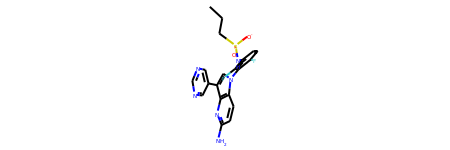

In [115]:
remote.coordinates.from_structure_id(12347, entity='ligand', output_format='rdkit', compute2d=False)

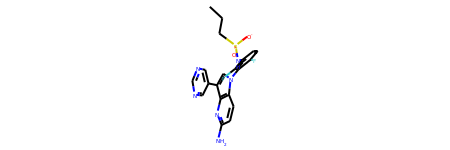

In [116]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/ligand.mol2"
local.coordinates.from_file(file_path, output_format="rdkit", compute2d=False)

### Protein

In [117]:
remote.coordinates.from_structure_id(12347, entity='protein').head()

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.type,residue.subst_id,residue.subst_name,atom.charge,atom.backbone,residue.name,residue.pdb_id,residue.klifs_id,residue.klifs_region
0,1,N,10.5459,36.4276,36.2952,N.4,1,TRP450,1.0,BACKBONE,TRP,450,NaN,NaN
1,2,H1,11.3045,36.9642,36.6910,H,1,TRP450,0.0,BACKBONE,TRP,450,NaN,NaN
2,3,H2,9.8719,37.0539,35.8786,H,1,TRP450,0.0,BACKBONE,TRP,450,NaN,NaN
3,4,H3,10.9079,35.8038,35.5881,H,1,TRP450,0.0,BACKBONE,TRP,450,NaN,NaN
4,5,CA,9.9005,35.6482,37.3473,C.3,1,TRP450,0.0,BACKBONE,TRP,450,NaN,NaN


In [118]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/protein.mol2"
local.coordinates.from_file(file_path).head()

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.type,residue.subst_id,residue.subst_name,atom.charge,atom.backbone,residue.name,residue.pdb_id
0,1,N,10.5459,36.4276,36.2952,N.4,1,TRP450,1.0,BACKBONE,TRP,450
1,2,H1,11.3045,36.9642,36.6910,H,1,TRP450,0.0,BACKBONE,TRP,450
2,3,H2,9.8719,37.0539,35.8786,H,1,TRP450,0.0,BACKBONE,TRP,450
3,4,H3,10.9079,35.8038,35.5881,H,1,TRP450,0.0,BACKBONE,TRP,450
4,5,CA,9.9005,35.6482,37.3473,C.3,1,TRP450,0.0,BACKBONE,TRP,450


### Pocket

In [119]:
remote.coordinates.from_structure_id(12347, entity='pocket').head()

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.type,residue.subst_id,residue.subst_name,atom.charge,atom.backbone,residue.name,residue.pdb_id,residue.klifs_id,residue.klifs_region
0,1,N,9.0135,18.2386,51.8602,N.3,1,GLN461,0.0,BACKBONE,GLN,461,1,I.1
1,2,H,8.2695,18.7862,52.2683,H,1,GLN461,0.0,BACKBONE,GLN,461,1,I.1
2,3,CA,8.8107,16.8107,51.6561,C.3,1,GLN461,0.0,BACKBONE,GLN,461,1,I.1
3,4,HA,9.7186,16.2932,51.9661,H,1,GLN461,0.0,BACKBONE,GLN,461,1,I.1
4,5,C,8.5594,16.4924,50.1864,C.2,1,GLN461,0.0,BACKBONE,GLN,461,1,I.1


In [120]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/pocket.mol2"
local.coordinates.from_file(file_path).head()

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.type,residue.subst_id,residue.subst_name,atom.charge,atom.backbone,residue.name,residue.pdb_id,residue.klifs_id,residue.klifs_region
0,1,N,9.0135,18.2386,51.8602,N.3,1,GLN461,0.0,BACKBONE,GLN,461,1,I.1
1,2,H,8.2695,18.7862,52.2683,H,1,GLN461,0.0,BACKBONE,GLN,461,1,I.1
2,3,CA,8.8107,16.8107,51.6561,C.3,1,GLN461,0.0,BACKBONE,GLN,461,1,I.1
3,4,HA,9.7186,16.2932,51.9661,H,1,GLN461,0.0,BACKBONE,GLN,461,1,I.1
4,5,C,8.5594,16.4924,50.1864,C.2,1,GLN461,0.0,BACKBONE,GLN,461,1,I.1


In [121]:
local.coordinates.from_structure_id(12347, "pocket", "mol2", "biopandas")

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.type,residue.subst_id,residue.subst_name,atom.charge,atom.backbone,residue.name,residue.pdb_id,residue.klifs_id,residue.klifs_region
0,1,N,9.0135,18.2386,51.8602,N.3,1,GLN461,0.00,BACKBONE,GLN,461,1,I.1
1,2,H,8.2695,18.7862,52.2683,H,1,GLN461,0.00,BACKBONE,GLN,461,1,I.1
2,3,CA,8.8107,16.8107,51.6561,C.3,1,GLN461,0.00,BACKBONE,GLN,461,1,I.1
3,4,HA,9.7186,16.2932,51.9661,H,1,GLN461,0.00,BACKBONE,GLN,461,1,I.1
4,5,C,8.5594,16.4924,50.1864,C.2,1,GLN461,0.00,BACKBONE,GLN,461,1,I.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,1152,HE1,-1.0757,23.3504,32.6778,H,78,PHE595,0.15,None,PHE,595,82,xDFG.82
1152,1153,CE2,1.2546,24.1723,30.3893,C.ar,78,PHE595,-0.15,None,PHE,595,82,xDFG.82
1153,1154,HE2,1.7640,25.0340,29.9838,H,78,PHE595,0.15,None,PHE,595,82,xDFG.82
1154,1155,CZ,0.3114,24.3324,31.3839,C.ar,78,PHE595,-0.15,None,PHE,595,82,xDFG.82


### Water

In [122]:
try:
    remote.coordinates.from_structure_id(12347, entity='water')
except ValueError as e:
    print(e)

Entity water is not available remotely.


In [123]:
file_path = "../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/water.mol2"
local.coordinates.from_file(file_path).head()

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.type,residue.subst_id,residue.subst_name,atom.charge,residue.name,residue.pdb_id
0,1,O,-29.7742,11.3869,19.8824,O.3,1,HOH,0.0,HOH,
1,2,H1,-28.8142,11.3869,19.8824,H,1,HOH,0.0,HOH,
2,3,H2,-30.0645,12.0339,20.5295,H,1,HOH,0.0,HOH,
